# HW 6 - Computational exploration of Phase Space

Return as *firstname_lastname-HW6.*
Specify your collaborators.


### Question 1 -  Categorizing the Phase Plane
Pick 2X2 matrices that satisfy the following 6 conditions.
* Det < 0
* Det > 0 & Trace > 0 & Real lambdas
* Det > 0 & Trace > 0 & Complex lambdas
* Det > 0 & Trace < 0 & Real lambdas
* Det > 0 & Trace < 0 & Complex lambdas
* Det > 0 & Trace = 0 & Imaginary lambdas

Plot the 2D phase portrait and eigenvectors (if they are real). Specify whether the fixed points are stable or unstable.

In [99]:
import numpy as np 

In [100]:
A1 = np.array([[1,4],[1,2]]) # Det < 0
print('Matrix A1 Det =', np.linalg.det(A1))

Matrix A1 Det = -2.0


Text(0, 0.5, 'x2 values of the state space')

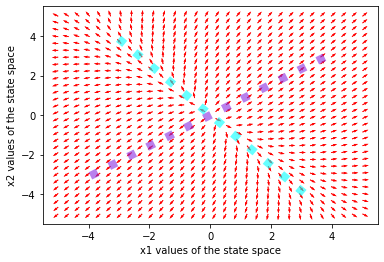

In [105]:
A2 = np.array([[4,2],[2,3]]) # Det > 0 & Trace > 0 & Real lambdas
#print('Matrix A2 Det = ', np.linalg.det(A2), 'and trace of A2 = ', np.trace(A2))


evals1, evecs1 = np.linalg.eig(A2)

def dxdt(state, t):
    
    x1 = state[0] #unpack the state variables
    x2 = state[1]
    
    #Define our system of equations  
    dx1dt = A2[0,0]*x1 + A2[0,1]*x2 
    dx2dt = A2[1,0]*x1 + A2[1,1]*x2 
    
    return(dx1dt, dx2dt)


state0 = [1, 100] # Intial conditions
t = np.linspace(0,5,1000) #Setup the time points to be evaluated 
state = odeint(dxdt, state0, t) #Run the integration


x1lim = [-5, 5]
x2lim = [-5, 5]
npoints = 30
s1 = np.linspace(x1lim[0], x1lim[1], npoints)
s2 = np.linspace(x2lim[0], x2lim[1], npoints)
S1, S2 = np.meshgrid(s1,s2) # capital 'S' is a matrix 
u, v = np.zeros(S1.shape), np.zeros(S2.shape) #u & v are the vector directions 
NI, NJ = S1.shape

for i in range(NI):
    for j in range(NJ):
        x1 = S1[i,j]
        x2 = S2[i,j]
        
        X = np.array(([x1],[x2])) #create X which will store as the state vector 
         
        Xdot = A2 @ X #Solve for dxdt
    
        u[i,j] = Xdot[0]  #store the dxdt vectors
        v[i,j] = Xdot[1]

M = (np.hypot(u,v))
M[M ==0] = 1
u/=M
v/=M

plt.quiver(s1,s2,u,v,color = 'red')

plt.plot(evecs1[0,0]*s1, evecs1[1,0]*s1, linewidth = 8, alpha = 0.6, linestyle = ':', color = 'blueviolet') #alpha controls transparency
plt.plot(evecs1[0,1]*s2, evecs1[1,1]*s2, linewidth = 8, alpha = 0.6, linestyle = ':', color = 'cyan')
plt.quiver(S1, S2, u, v, color = 'r')
plt.xlabel('x1 values of the state space')
plt.ylabel('x2 values of the state space')

In [57]:
A3 = np.array([[4,-1],[-2,3]]) # Det > 0 & Trace > 0 & Complex lambdas
print('Matrix A3, with complex lambdas Det = ', np.linalg.det(A3), 'and trace of A3 = ', np.trace(A3))

Matrix A3, with complex lambdas Det =  10.000000000000002 and trace of A3 =  7


Matrix A4, with real lambdas Det =  -45.000000000000014 and trace of A4 =  -7


Text(0, 0.5, 'x2 values of the state space')

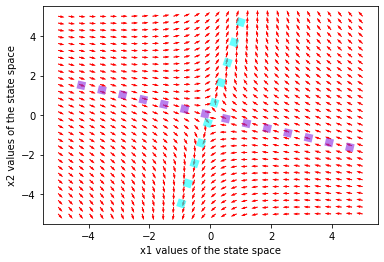

In [116]:
A4 = np.array([[-10,3],[5,3]]) # Det > 0 & Trace < 0 & Real lambdas
print('Matrix A4, with real lambdas Det = ', np.linalg.det(A4), 'and trace of A4 = ', np.trace(A4))

evals2, evecs2 = np.linalg.eig(A4)

def dxdt(state, t):
    
    x1 = state[0] #unpack the state variables
    x2 = state[1]
    
    #Define our system of equations  
    dx1dt = A4[0,0]*x1 + A4[0,1]*x2 
    dx2dt = A4[1,0]*x1 + A4[1,1]*x2 
    
    return(dx1dt, dx2dt)


state0 = [1, 100] # Intial conditions
t = np.linspace(0,5,1000) #Setup the time points to be evaluated 
state = odeint(dxdt, state0, t) #Run the integration


x1lim = [-5, 5]
x2lim = [-5, 5]
npoints = 30
s1 = np.linspace(x1lim[0], x1lim[1], npoints)
s2 = np.linspace(x2lim[0], x2lim[1], npoints)
S1, S2 = np.meshgrid(s1,s2) # capital 'S' is a matrix 
u, v = np.zeros(S1.shape), np.zeros(S2.shape) #u & v are the vector directions 
NI, NJ = S1.shape

for i in range(NI):
    for j in range(NJ):
        x1 = S1[i,j]
        x2 = S2[i,j]
        
        X = np.array(([x1],[x2])) #create X which will store as the state vector 
         
        Xdot = A4 @ X #Solve for dxdt
    
        u[i,j] = Xdot[0]  #store the dxdt vectors
        v[i,j] = Xdot[1]

M = (np.hypot(u,v))
M[M ==0] = 1
u/=M
v/=M

plt.quiver(s1,s2,u,v,color = 'red')

plt.plot(evecs2[0,0]*s1, evecs2[1,0]*s1, linewidth = 8, alpha = 0.6, linestyle = ':', color = 'blueviolet') #alpha controls transparency
plt.plot(evecs2[0,1]*s2, evecs2[1,1]*s2, linewidth = 8, alpha = 0.6, linestyle = ':', color = 'cyan')
plt.quiver(S1, S2, u, v, color = 'r')
plt.xlabel('x1 values of the state space')
plt.ylabel('x2 values of the state space')

In [119]:
A5 = np.array([[2,-2],[5,-4]]) # Det > 0 & Trace < 0 & Complex lambdas
print('Matrix A5, with complex lambdas Det = ', np.linalg.det(A5), 'and trace of A5 = ', np.trace(A5))

Matrix A5, with complex lambdas Det =  1.9999999999999993 and trace of A5 =  -2


In [108]:
A6 = np.array([[5,-8],[4,-5]]) # Det > 0 & Trace = 0 & Imaginary lambdas
print('Matrix A6, with imaginary lambdas Det = ', np.linalg.det(A6), 'and trace of A6 = ', np.trace(A6))

Matrix A6, with imaginary lambdas Det =  7.000000000000001 and trace of A6 =  0


## Question 2 - Multiple Equillibria in 2D

Consider a model where Sharks eat Tuna causing Tuna populations to diminish and Shark populations to increase. 

$$\dot{S} = 0.01ST - 0.2S$$
$$\dot{T} = 0.05T - 0.01ST$$

Plot this phase plane.
How many equilibrium points are there, what are their coordinates?
What is each one's biological significance?



In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint 

Text(0, 0.5, 'population')

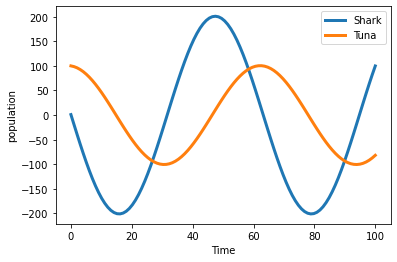

In [75]:
T = np.array([[0.01,-0.2],[0.05,-0.01]])
def dxdt(state, t):
    
    x1 = state[0] #unpack the state variables
    x2 = state[1]
    
    #Define our system of equations  
    dx1dt = T[0,0]*x1 + T[0,1]*x2 
    dx2dt = T[1,0]*x1 + T[1,1]*x2 
    
    return(dx1dt, dx2dt)


state0 = [1, 100] # Intial conditions
t = np.linspace(0,100,100) #Setup the time points to be evaluated 
state = odeint(dxdt, state0, t) #Run the integration

plt.plot(t, state[:,0], label = 'Shark', linewidth = 3)
plt.plot(t, state[:,1], label = 'Tuna', linewidth = 3)
plt.legend()
plt.xlabel('Time')
plt.ylabel('population')

#### Answer: There are two unique equilibrium points in this mode: one lower equilbrium point that marks the start of the shift from a lower to higher population of both sharks and tuna, and then a second point marks the start of the decline of both populations. 

/Users/rafael/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/rafael/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'x2 values of the state space')

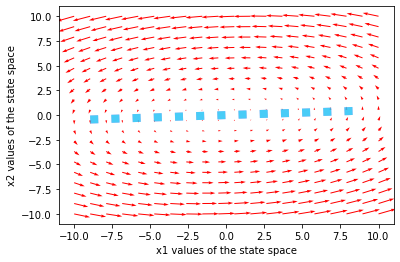

In [79]:
x1lim = [-10, 10]
x2lim = [-10, 10]

npoints = 20

s1 = np.linspace(x1lim[0], x1lim[1], npoints)
s2 = np.linspace(x2lim[0], x2lim[1], npoints)

S1, S2 = np.meshgrid(s1,s2) # capital 'S' is a matrix 

u, v = np.zeros(S1.shape), np.zeros(S2.shape) #u & v are the vector directions 

NI, NJ = S1.shape

for i in range(NI):
    for j in range(NJ):
        x1 = S1[i,j]
        x2 = S2[i,j]
        
        X = np.array(([x1],[x2])) #create X which will store as the state vector 
         
        Xdot = T @ X #Solve for dxdt
    
        u[i,j] = Xdot[0]  #store the dxdt vectors
        v[i,j] = Xdot[1]

evals, evecs = np.linalg.eig(T) #What do the eigenvectors mean in this picture 

plt.plot(evecs[0,0]*s1, evecs[1,0]*s1, linewidth = 8, alpha = 0.6, linestyle = ':', color = 'blueviolet') #alpha controls transparency
plt.plot(evecs[0,1]*s2, evecs[1,1]*s2, linewidth = 8, alpha = 0.6, linestyle = ':', color = 'cyan')

plt.quiver(S1, S2, u, v, color = 'r')

plt.xlabel('x1 values of the state space')
plt.ylabel('x2 values of the state space')

## Extra Credit - 3D Phase Fields
Consider the following block of code.

Plot the 3D phase field of the equation from -2:2 in all dimensions

$$\dot{x} = -z$$
$$\dot{y} = -x$$
$$\dot{z} = y$$

Plot 10 trajectories through the phase field. 


In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0,10.0)
from mpl_toolkits.mplot3d import Axes3D 

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True) #They upgraded a normalize argument into quiver so no more normalization needed

plt.show()

### Collaborators: Brina Aceves, Sumel Dhanoa